# LABORATORY SESSION - WEEK 2 

### Problem 1

Import and visualize some networks from the data sources given.

### Solution 

### Source 1 

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the node and edge files
nodes_file_path = r'week_02/data/got-s1-nodes.csv'
edges_file_path = r'week_02/data/got-s1-edges.csv'

# Read the CSV files
nodes_df = pd.read_csv(nodes_file_path) # nodes detaframe
edges_df = pd.read_csv(edges_file_path) # edges dataframe 

In [38]:
# show nodes dataframe 
nodes_df.head()

,Id,Label
0,ADDAM_MARBRAND,Addam
1,AEGON,Aegon
2,AERYS,Aerys
3,ALLISER_THORNE,Allister
4,ARYA,Arya


In [39]:
# show edges dataframe 
edges_df.head()

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


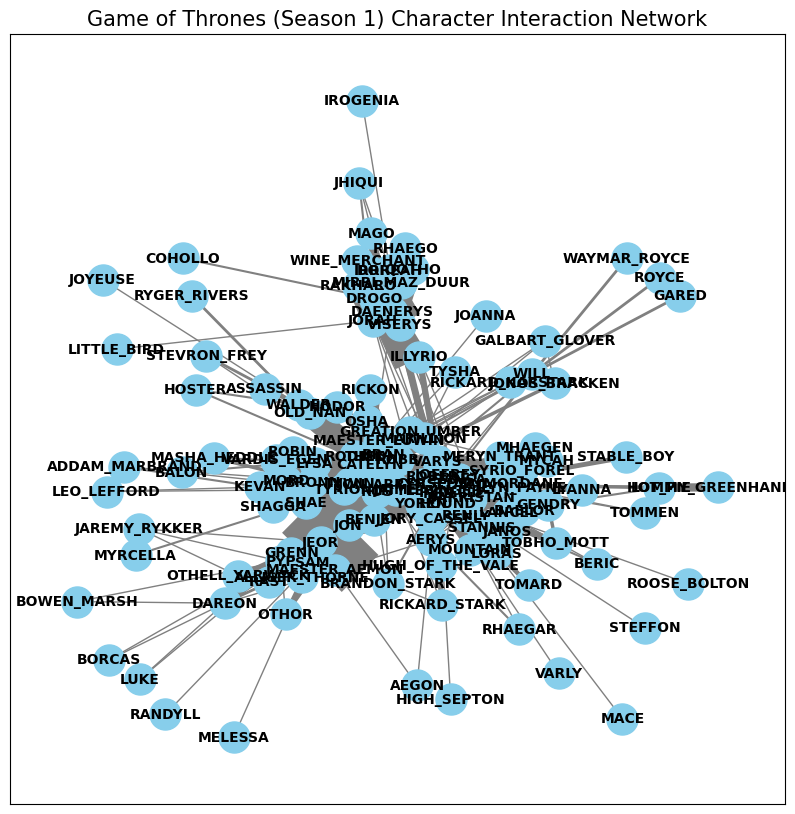

In [42]:
# Create a graph
G = nx.Graph()

# Add nodes with labels
for index, row in nodes_df.iterrows():
    G.add_node(row['Id'], label=row['Label']) # add vertices 

# Add edges with weights
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight']) # add edges and weights  

# Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3, seed=42)  # Generate positions for each node

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")

# Draw edges with width based on weight
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[0.5 * w for w in weights], edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Add a title
plt.title("Game of Thrones (Season 1) Character Interaction Network", size=15)

# Show the graph
plt.show()


### Source 2 

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Path to the edges text file
edges_file_path = r'week_02/data/bio-CE-CX.txt'

# Read the edges from the text file
# Assuming that the file is space-separated (adjust delimiter if necessary)
edges_df = pd.read_csv(edges_file_path, delim_whitespace=True, header=None, names=['Source', 'Target', 'Weight'])
edges_df.head()

,Source,Target,Weight
0,0,1,1.573369
1,2,3,1.764815
2,2,4,1.578683
3,2,5,1.602421
4,6,7,1.642258


Graph has 15229 nodes and 245952 edges.


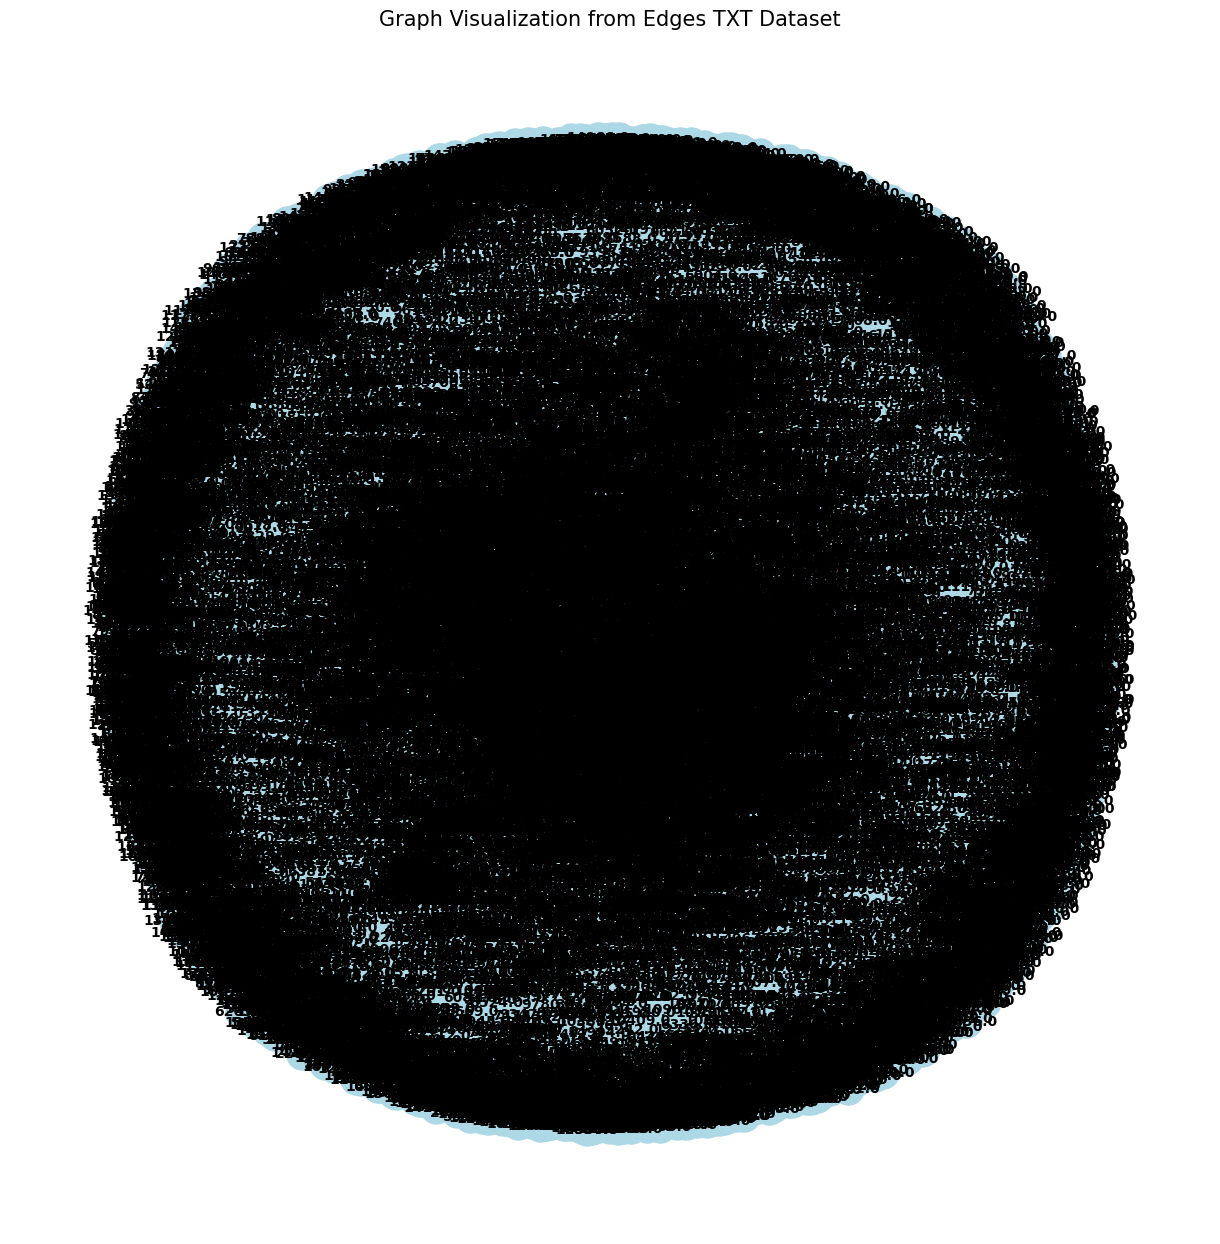

In [7]:
# Create a graph object
G = nx.Graph()

# Add edges to the graph (considering the 'Weight' column if present)
for index, row in edges_df.iterrows():
    if 'Weight' in edges_df.columns:
        G.add_edge(row['Source'], row['Target'], weight=row['Weight'])
    else:
        G.add_edge(row['Source'], row['Target'])

# Optional: Print graph info to verify it was loaded correctly
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Visualize the graph
plt.figure(figsize=(12, 12))

# Generate layout for node positions (spring layout makes it visually pleasing)
pos = nx.spring_layout(G, k=0.3, seed=42)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', 
        font_size=10, font_weight='bold', edge_color='gray')

# Add a title to the plot
plt.title("Graph Visualization from Edges TXT Dataset", size=15)

# Show the graph
plt.show()


### Source 3 

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Path to the edges text file
edges_file_path = r'week_02/data/budapest_connectome_3.0_209_0_median.csv'

# Read the edges from the text file
# Assuming that the file is space-separated (adjust delimiter if necessary)
edges_df = pd.read_csv(edges_file_path,  delimiter=';')
edges_df.head()

,id node1,id node2,name node1,name node2,parent id node1,parent id node2,parent name node1,parent name node2,edge confidence,edge weight(med nof)
0,127,504,rh.caudalmiddlefrontal_11,Right-Putamen,9,37,ctx-rh-caudalmiddlefrontal,Right-Putamen,411,25.0
1,127,145,rh.caudalmiddlefrontal_11,rh.precentral_19,9,10,ctx-rh-caudalmiddlefrontal,ctx-rh-precentral,294,5.0
2,127,131,rh.caudalmiddlefrontal_11,rh.caudalmiddlefrontal_6,9,9,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalmiddlefrontal,327,8.0
3,127,494,rh.caudalmiddlefrontal_11,rh.insula_10,9,34,ctx-rh-caudalmiddlefrontal,ctx-rh-insula,328,6.0
4,127,189,rh.caudalmiddlefrontal_11,rh.caudalanteriorcingulate_5,9,13,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalanteriorcingulate,217,3.0


Graph has 480 nodes and 1000 edges.


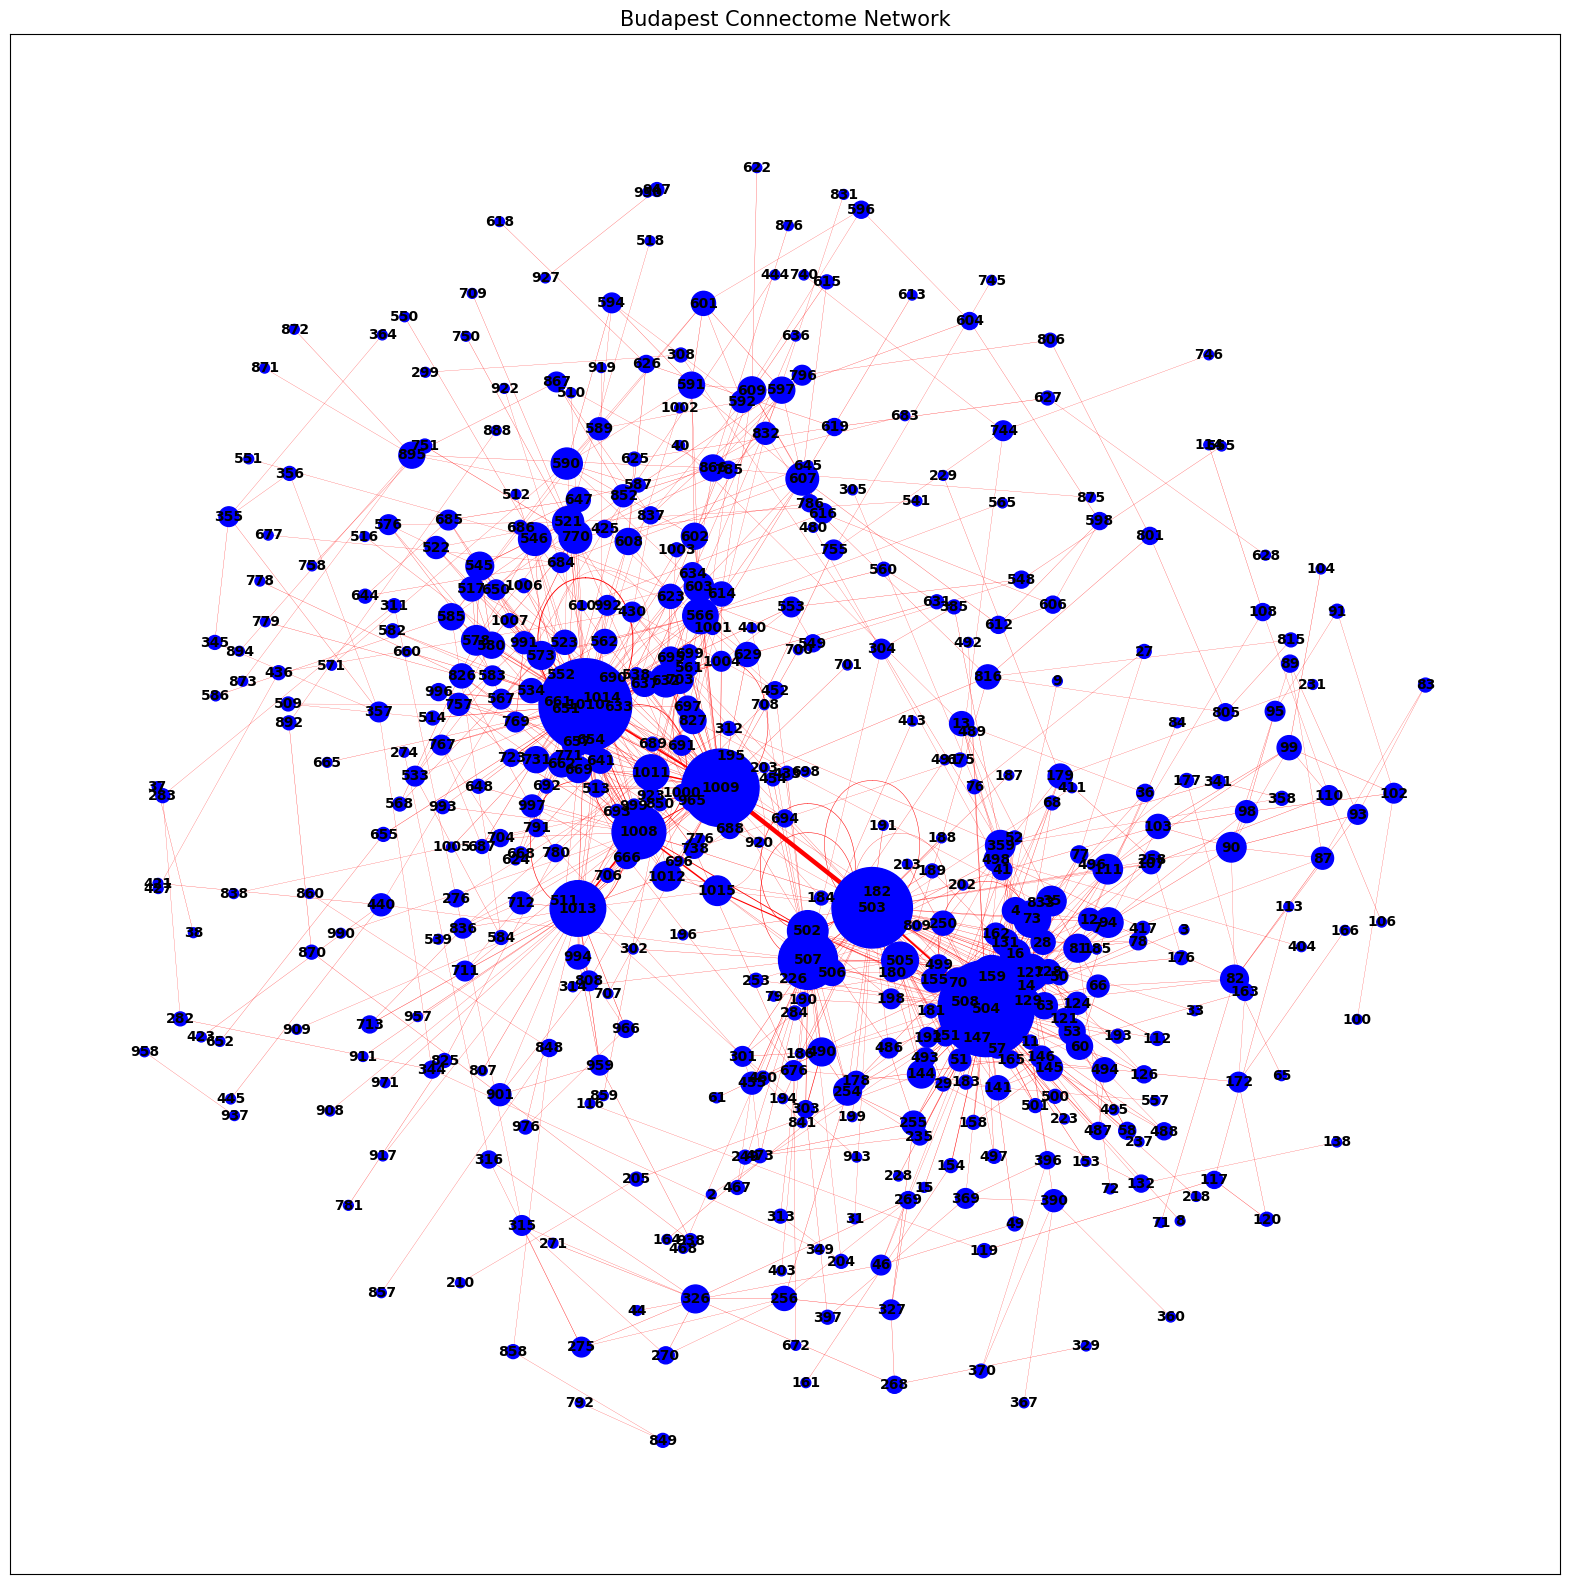

In [36]:
# Create a graph object
G = nx.Graph()

plt.figure(figsize=(20, 20))

# Add edges to the graph with weights
for index, row in edges_df.iterrows():
    # Add the edge with weight (med nof)
    G.add_edge(row['id node1'], row['id node2'], weight=row['edge weight(med nof)'])

# Optional: Print graph info to verify it was loaded correctly
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Generate layout for the network (spring layout works well)
pos = nx.spring_layout(G, k=0.3, seed=42)

# Draw nodes with size based on degree (number of connections)
node_sizes = [G.degree(n) * 50 for n in G.nodes()]  # Size based on degree
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')

# Draw edges with width based on weight
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[0.1 + w * 0.02 for w in weights], edge_color='red')

# Draw node labels (using names from the 'name node1' and 'name node2' columns)
# Create a dictionary of node IDs to node names
node_labels = pd.Series(edges_df['id node1'].values, index=edges_df['id node1']).to_dict()
node_labels.update(pd.Series(edges_df['id node2'].values, index=edges_df['id node2']).to_dict())

# Add labels
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Add a title to the plot
plt.title("Budapest Connectome Network", size=15)

# Display the plot
plt.show()

### Source 4 

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the node and edge files
nodes_file_path = r'week_02/data/Network-1-NODES.csv'
edges_file_path = r'week_02/data/Network-1-EDGES.csv'

# Read the CSV files
nodes_df = pd.read_csv(nodes_file_path) # nodes detaframe
edges_df = pd.read_csv(edges_file_path) # edges dataframe 

In [18]:
# show nodes dataframe 
nodes_df.head()

,id,person,unit,unit_id,tenure
0,s01,Bruce Banner,Legal,2,22
1,s02,Bucky Barnes,Legal,2,10
2,s03,Carol Danvers,Legal,2,14
3,s04,Clint Barton,Marketing,3,11
4,s05,Donald Blake,PR,4,8


In [19]:
# show edges dataframe 
edges_df.head()

,from,to,link,score
0,s01,s02,financial,1
1,s01,s03,financial,2
2,s01,s04,financial,3
3,s01,s05,contract,12
4,s01,s06,financial,2


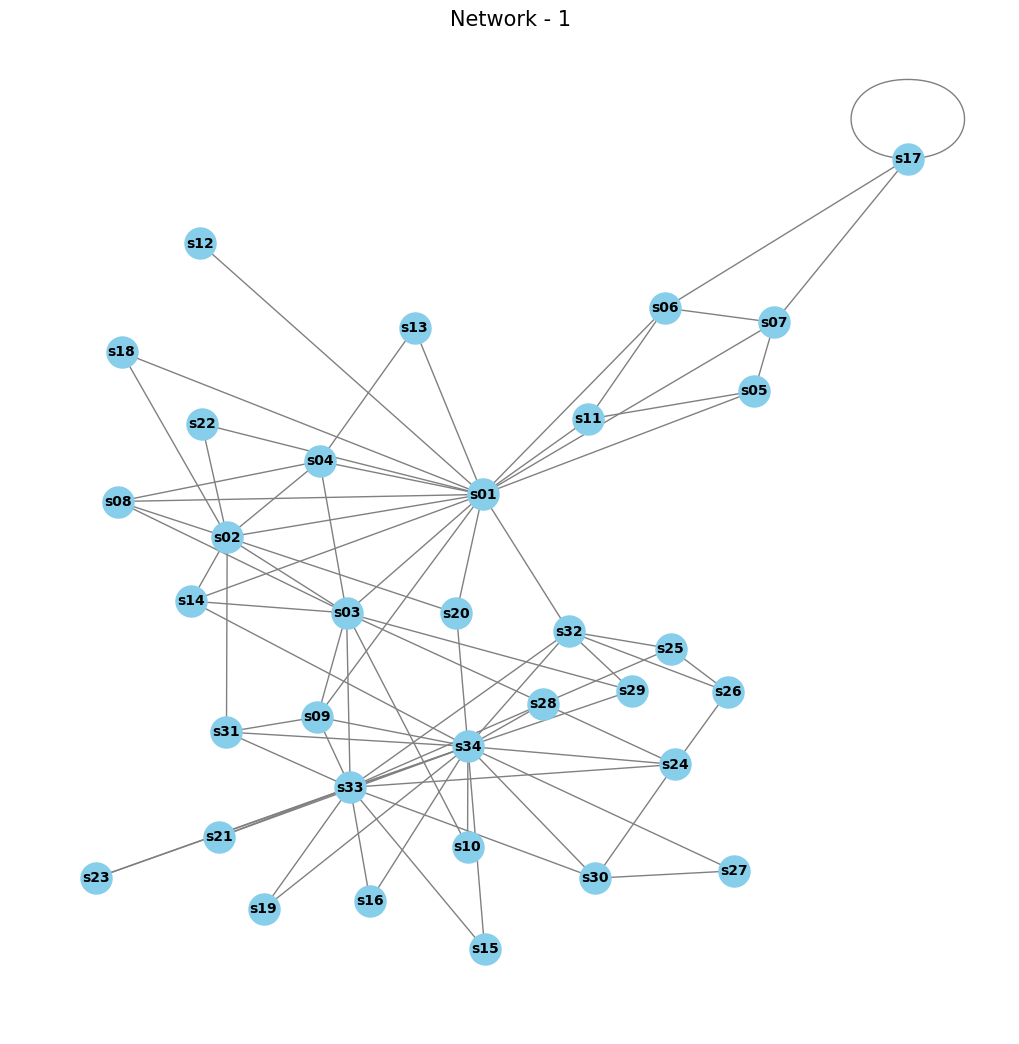

In [20]:
# Create a graph
G = nx.Graph()

# Add nodes with labels
for index, row in nodes_df.iterrows():
    G.add_node(row['id'], label=row['person']) # add vertices 

# Add edges with weights
for index, row in edges_df.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['score']) # add edges and weights  

# Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3, seed=42)  # Generate positions for each node

# Draw the nodes, edges, and labels
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", 
        font_size=10, font_weight="bold", edge_color="gray")

plt.title("Network - 1", size=15)
plt.show()